Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
# We will now import the data
from google.colab import files
uploaded=files.upload()

Saving eastwestairlines.csv to eastwestairlines.csv


In [3]:
df=pd.read_csv("eastwestairlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape


(3999, 12)

In [6]:
df.set_index('ID#',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [7]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
list(df.columns)

['Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

Performing Exploratory Data Analysis (EDA)

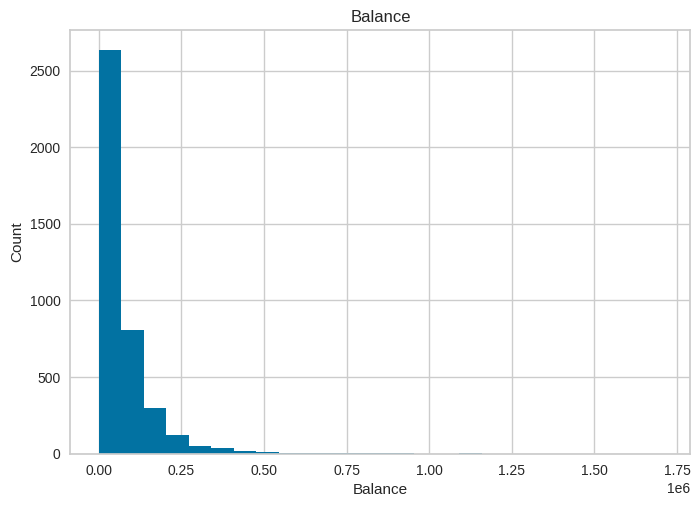

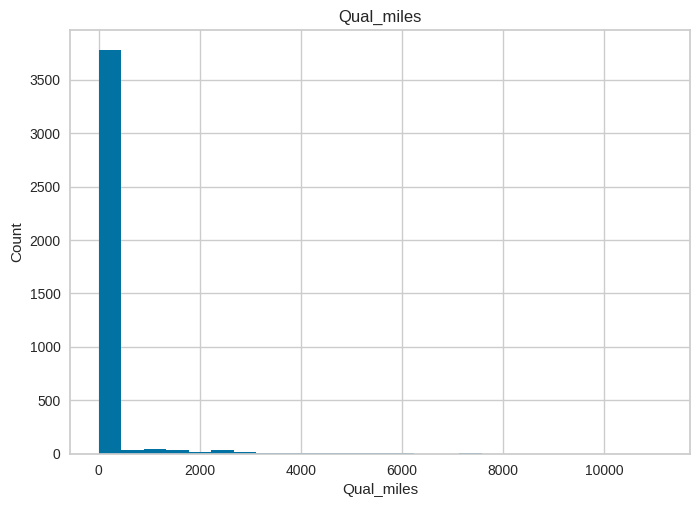

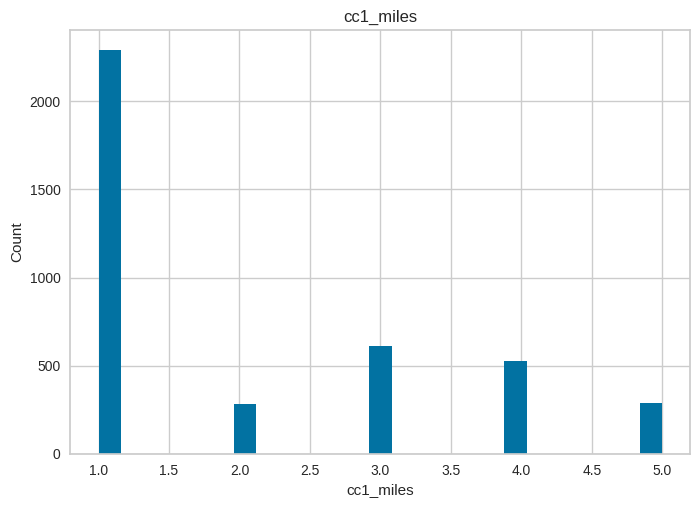

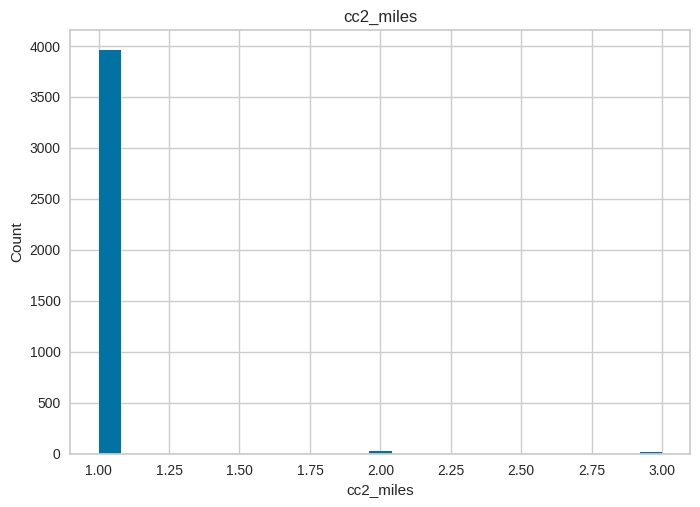

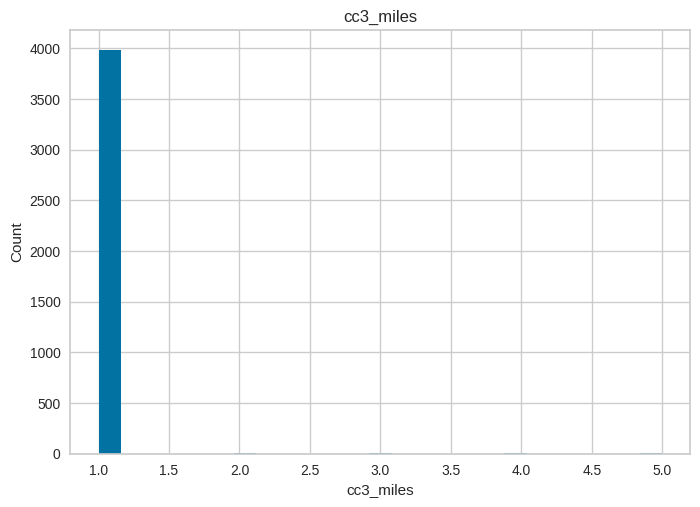

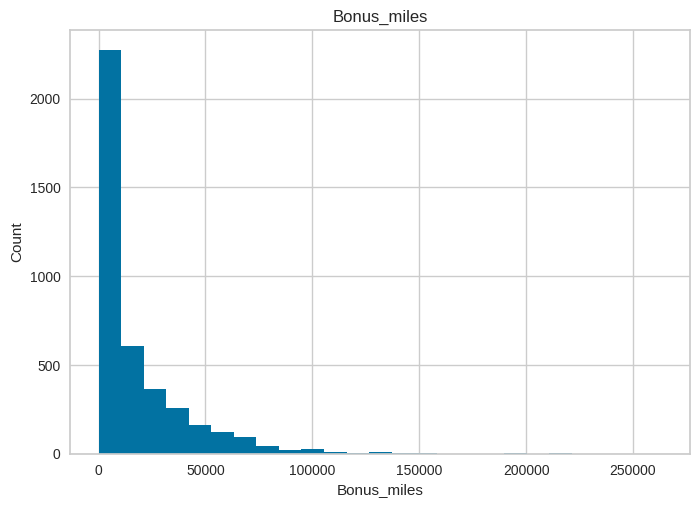

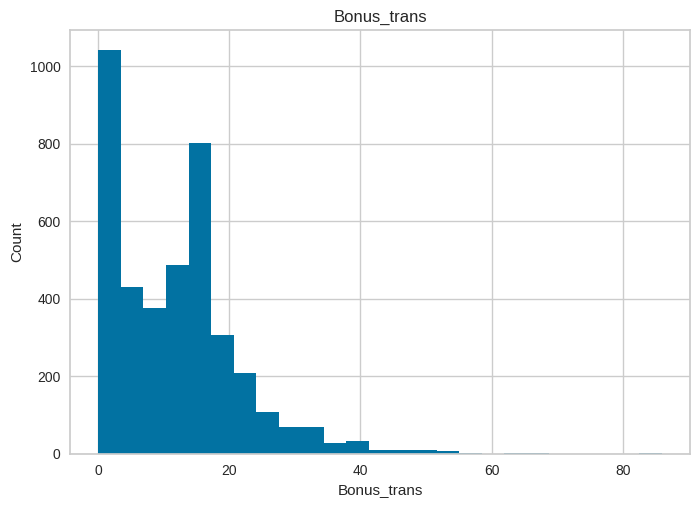

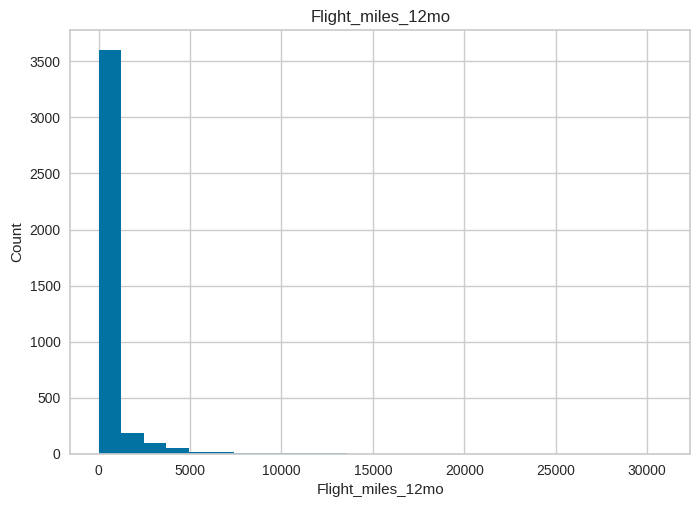

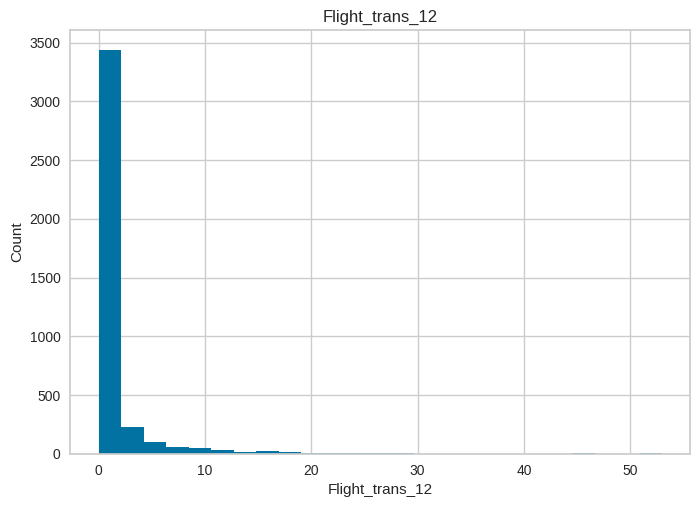

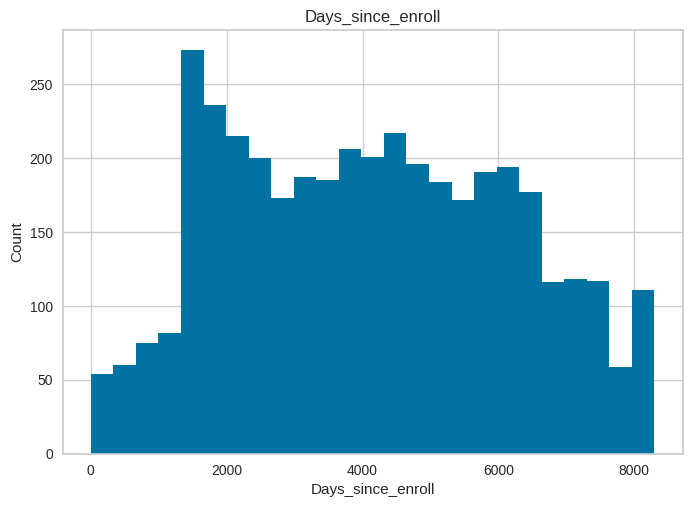

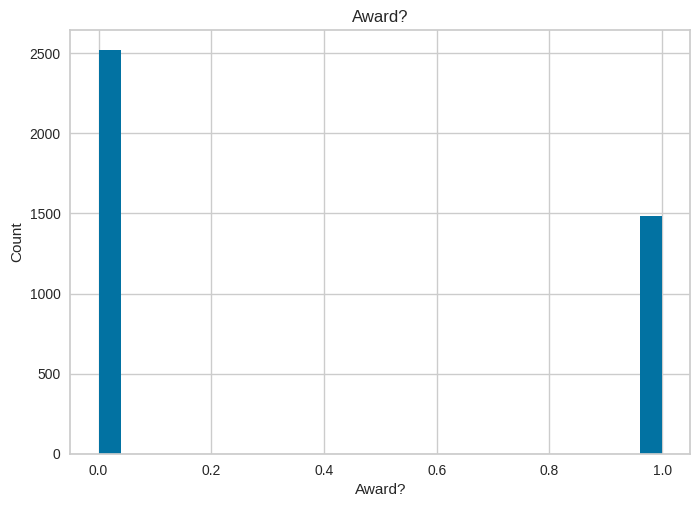

In [9]:
for  feature in df.columns:
  df_data=df.copy()
  df_data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

Recognising Outliers from the given Dataset

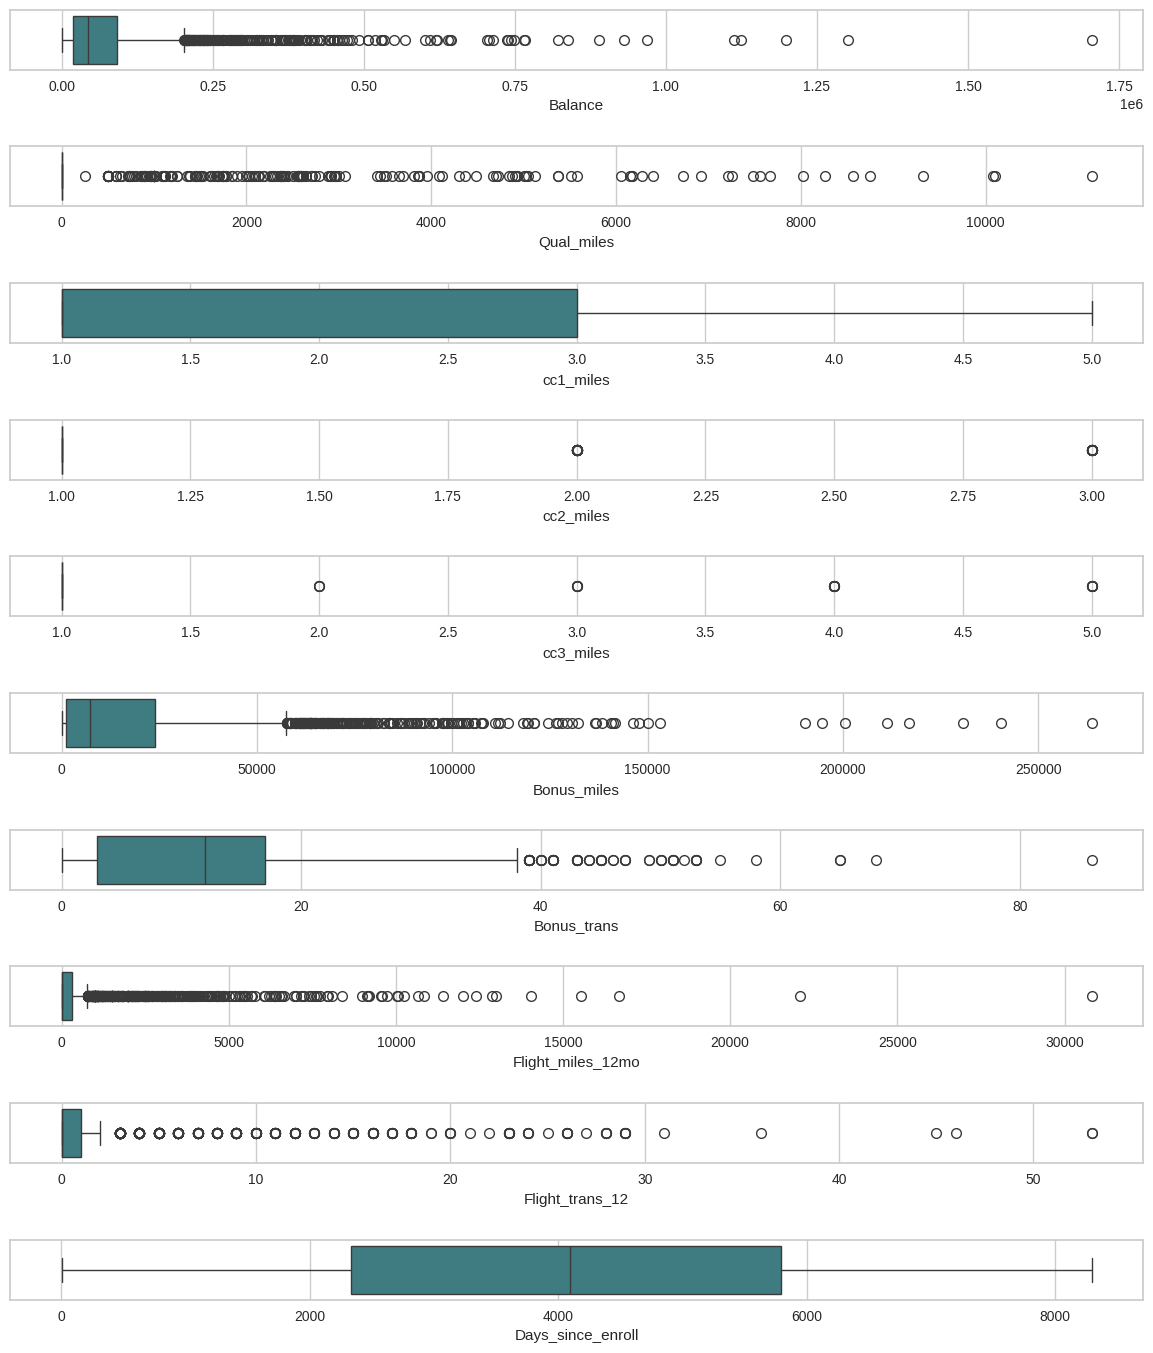

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
outlier = df.copy()

fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)

sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)
plt.show()


In [11]:
corr_matrix=df.corr()
corr_matrix.sort_values('Balance',ascending=False)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Award?,0.178494,0.095256,0.335457,0.005332,0.023484,0.373506,0.333893,0.217715,0.247909,0.188121,1.000000
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484


Correlation Heatmap

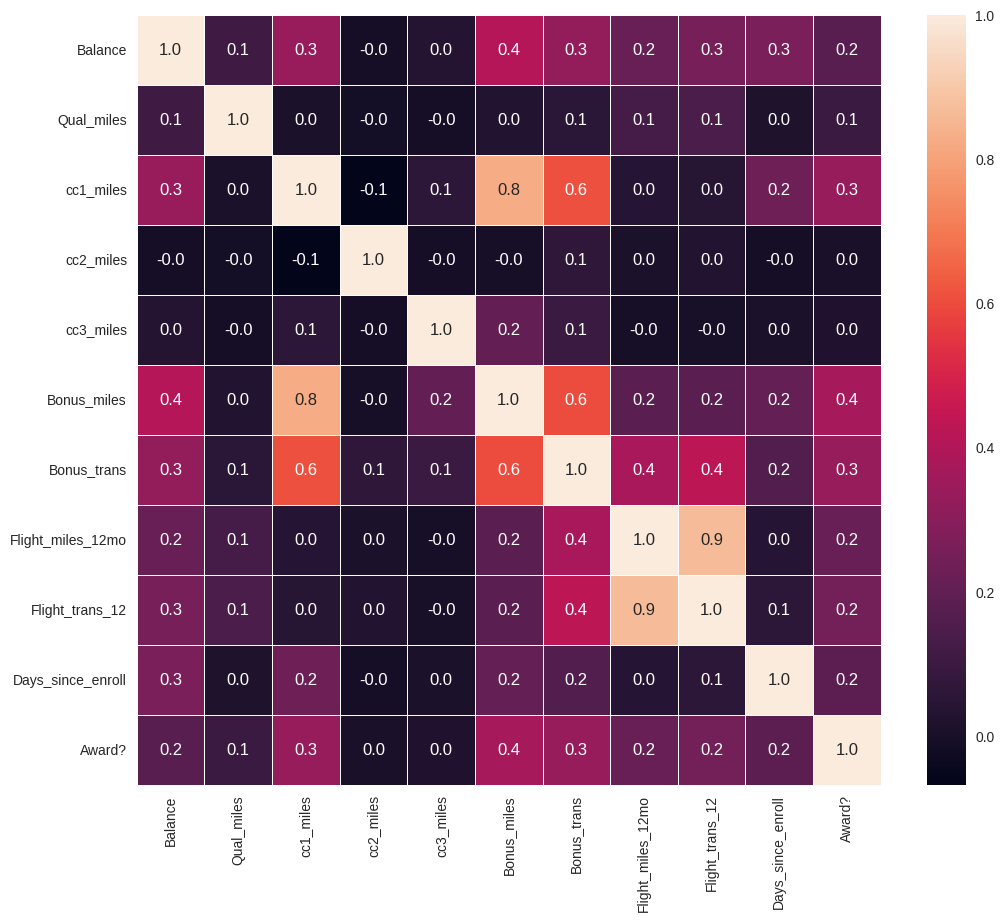

In [12]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Data Preprocessing

In [13]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled.shape

(3999, 11)

In [14]:
# Normalising the data
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
df_norm=norm.fit_transform(df)
df_norm.shape

(3999, 11)

K-means Clustring

In [15]:
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.246825
3,4,27154.035327
4,5,24885.833054
5,6,21480.129074
6,7,19880.008303
7,8,17316.753604
8,9,15965.017866
9,10,14726.983323


Within-Cluster Sum of Squares Critrion

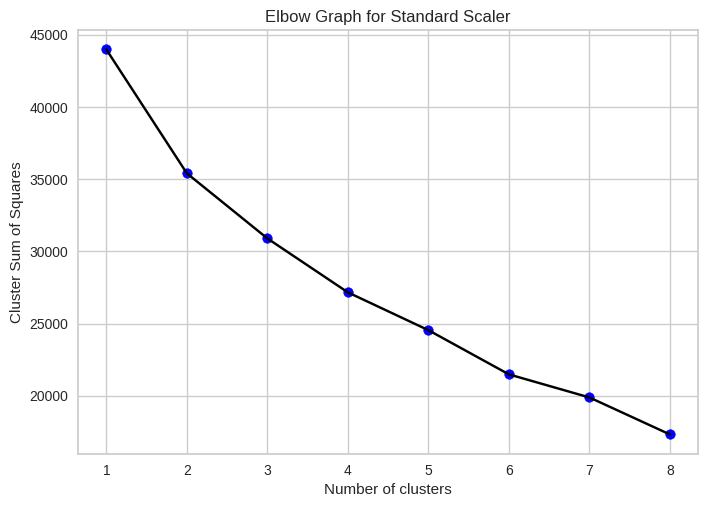

In [16]:
cluster_sum_of_squares = []
for i in range(1,9):
    km = KMeans(n_clusters=i, random_state=2)
    km.fit(df_scaled)
    cluster_sum_of_squares.append(km.inertia_)

# Plot K value range vs cluster_sum_of_squares to get elbow graph for choosing k
import matplotlib.pyplot as plt
plt.plot(range(1,9),cluster_sum_of_squares, color = "black")
plt.scatter(range(1,9),cluster_sum_of_squares,color="blue")
plt.title("Elbow Graph for Standard Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Sum of Squares")
plt.show()

Silhouette *Score*

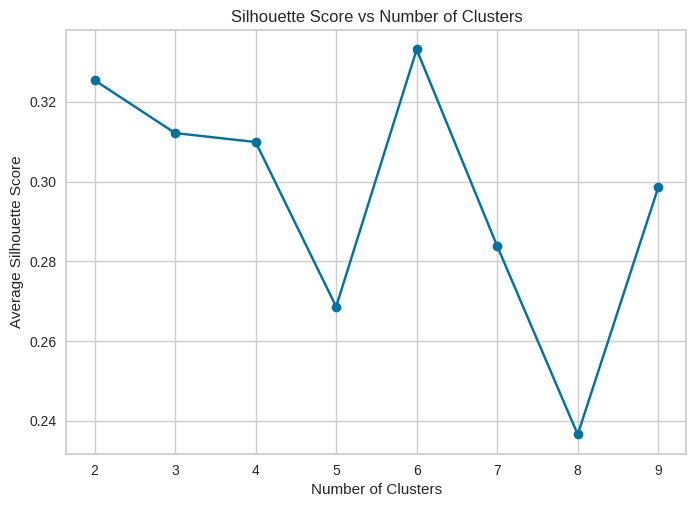

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]
silhouette_avg = []
for n in range_n_clusters:
  kmeans = KMeans(n_clusters=n, init='k-means++').fit(df_scaled)
  silhouette_avg.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [18]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(df_scaled)
    sil_score1= silhouette_score(df_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


Conclusion: According to the Silhouette score the ideal number of cluster is 6 with a Silhouette score which is 0.3338735662323181 which is higher than the rest

Building a KMeans Cluster algorithm using k=6

In [25]:
models_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = models_kmeans.fit_predict(df_scaled)
y_predict_kmeans.shape

(3999,)

In [26]:
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [27]:
models_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [28]:
model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [29]:
model_kmeans.inertia_

21089.973628929638

In [30]:
df=pd.read_csv("eastwestairlines.csv")
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_Label'] = model_kmeans.labels_

In [31]:
df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,1599.831858,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,2233.860465,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


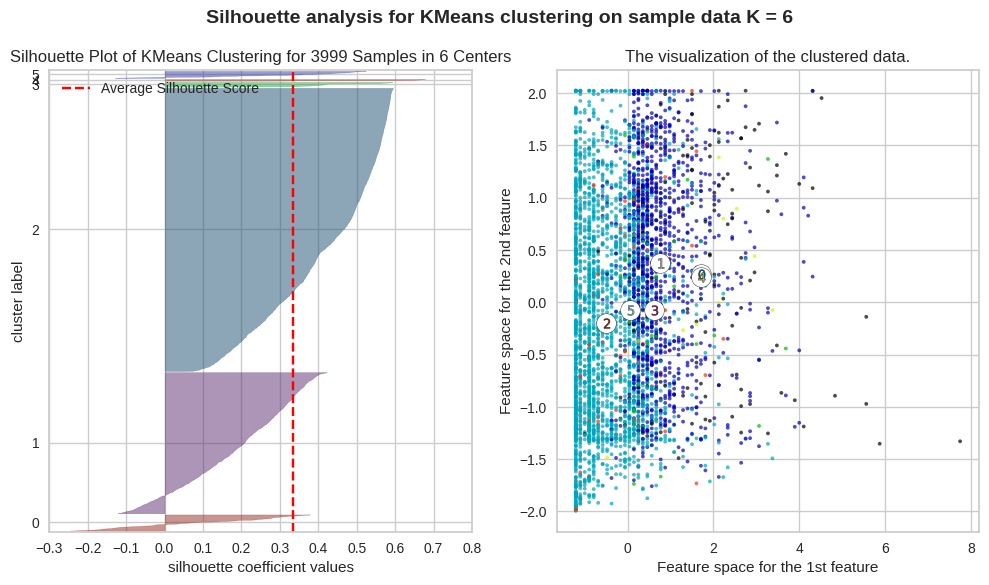

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

visualizer = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
visualizer.fit(df_scaled)

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(df_scaled[:, 6], df_scaled[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

 # Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "K = %d" % 6),fontsize=14, fontweight='bold')

visualizer.show()
plt.show()

DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [44]:
from itertools import product
eps_values = np.arange(0.25,3,0.25)
min_samples = np.arange(3,23)
param_combinations = list(product(eps_values, min_samples))

In [45]:
no_of_clusters=[]
silhouette_scores=[]

for p in param_combinations:
  dbscan_clustring= DBSCAN(eps=p[0],min_samples=p[1])
  dbscan_clustring.fit(df_scaled)
  no_of_clusters.append(len(set(dbscan_clustring.labels_)))
  silhouette_scores.append(silhouette_score(df_scaled,dbscan_clustring.labels_))

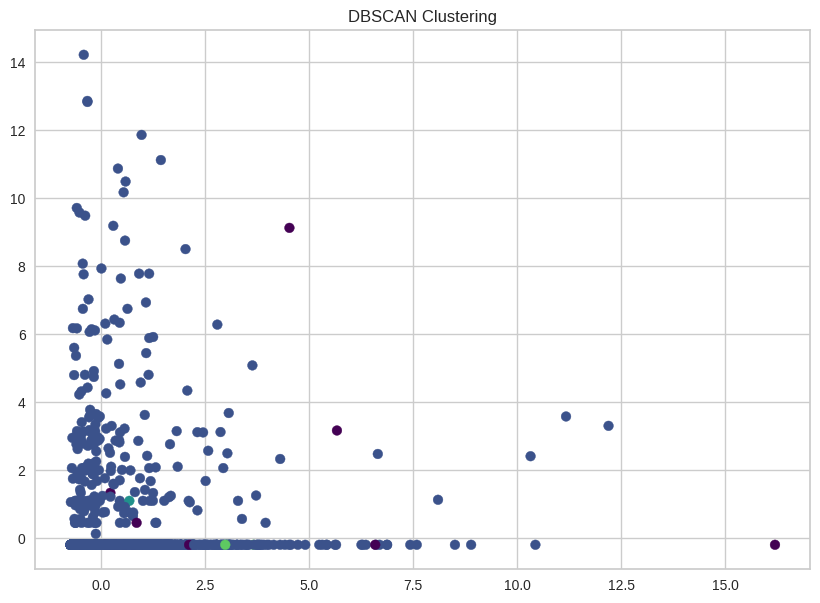

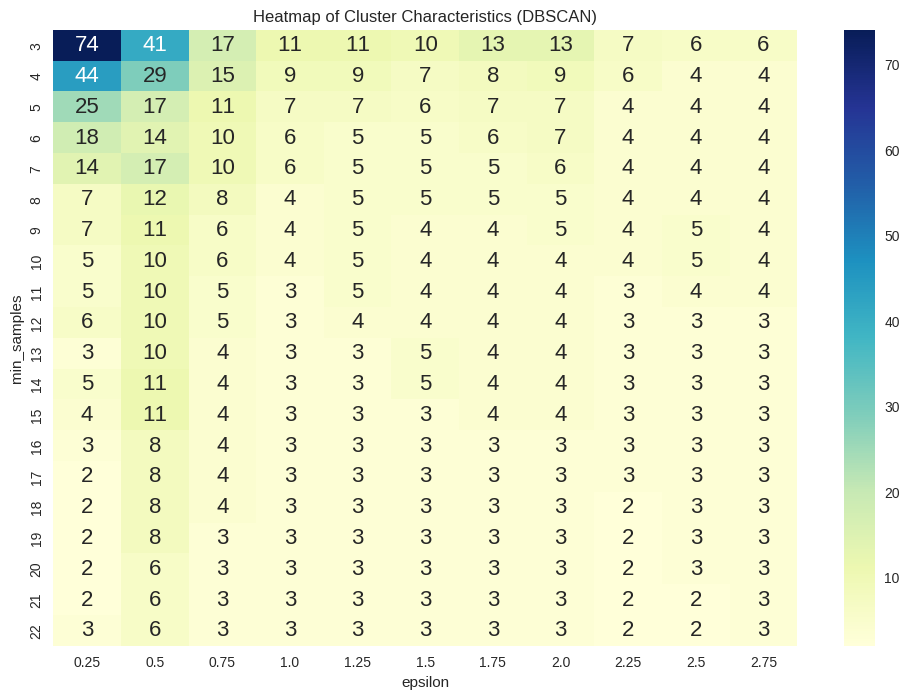

In [52]:
# plot a histogram and a heatmap for the formed cluster
df_dbscan_tuning = pd.DataFrame(param_combinations,columns=['epsilon','min_samples'])
df_dbscan_tuning['no_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(df_dbscan_tuning, values='no_of_clusters', index='min_samples', columns='epsilon')

# Building a DBSCAN Cluster algorithm using eps=5 and min_samples=5
dbscan_model = DBSCAN(eps=5, min_samples=5).fit(df_scaled)
dbscan_model.labels_

df['DBSCAN_labels'] = dbscan_model.labels_
df.groupby('DBSCAN_labels').agg(['mean'])

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=dbscan_model.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
# Heatmap for the clusters

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.title('Heatmap of Cluster Characteristics (DBSCAN)')
plt.show()


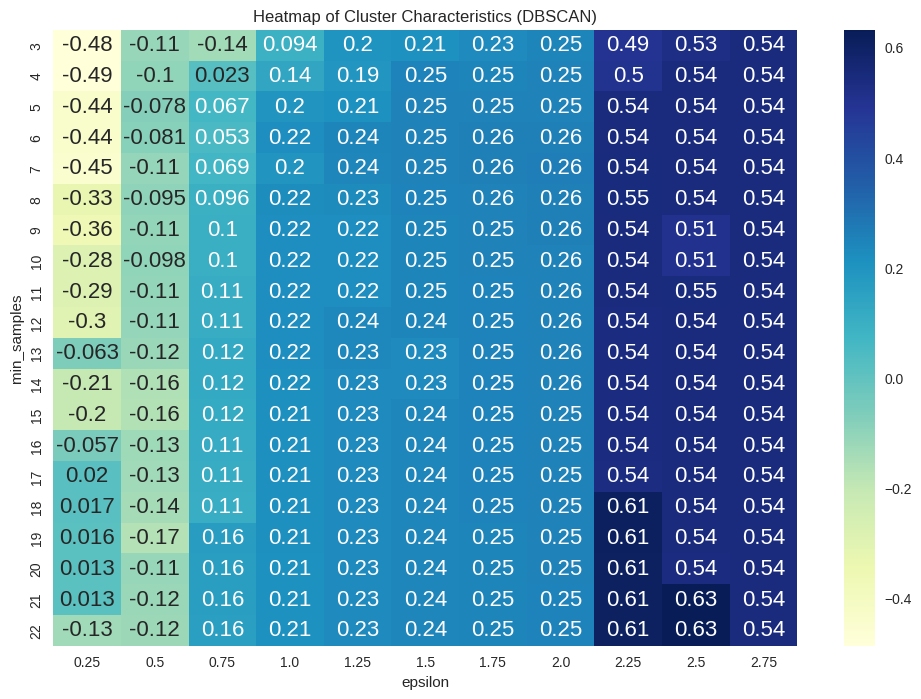

In [56]:
df_dbscan_tuning = pd.DataFrame(param_combinations,columns=['epsilon','min_samples'])
df_dbscan_tuning['Silhouette_score'] = silhouette_scores # Use the calculated silhouette_scores list
pivot_1 = pd.pivot_table(df_dbscan_tuning, values='Silhouette_score', index='min_samples', columns='epsilon')

# Heatmap for the clusters

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette_score')
plt.title('Heatmap of Cluster Characteristics (DBSCAN)')
plt.show()

In [57]:
# Finding the optimal epsilon and min_samples values
optimal_index = np.argmax(silhouette_scores)
optimal_epsilon, optimal_min_samples = param_combinations[optimal_index]
optimal_num_clusters = no_of_clusters[optimal_index]
optimal_silhouette_score = silhouette_scores[optimal_index]

print("Optimal Epsilon:", optimal_epsilon)
print("Optimal Min Samples:", optimal_min_samples)
print("Number of Clusters:", optimal_num_clusters)
print("Average Silhouette Score:", optimal_silhouette_score)


Optimal Epsilon: 2.5
Optimal Min Samples: 21
Number of Clusters: 2
Average Silhouette Score: 0.6319395906853672


In [61]:
# now we willrun DBSCAN on standard Scaled data with Optimal Epsilon and Optimal Min Samples
dbscan_model = DBSCAN(eps=2.5, min_samples=21).fit(df_scaled)
df['DBSCAN_labels'] = dbscan_model.labels_
df.groupby('DBSCAN_labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,2.038462
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,1.662094


Conclusion:
Clustering Performance: Based on the silhouette scores, DBSCAN with eps=2.5 and min_samples=21 provides a higher silhouette score (0.63) than K-Means with k=6 (0.33), suggesting that DBSCAN produces more cohesive and well-separated clusters for this particular dataset.

Optimal Clustering Method: Although K-Means is commonly used and works well for spherical clusters, DBSCAN excels in cases where the clusters have irregular shapes or varying densities, especially when outliers are present. For this dataset, DBSCAN is the more effective model for clustering.

Cluster Interpretations: The K-Means clustering gives insight into grouping customers based on their spending behavior and loyalty program interactions, while DBSCAN is more robust to noise and highlights two distinct clusters that may represent two major segments of customers with differing behaviors.

